In [92]:
import pandas as pd 
import numpy as np
import scipy.stats as si
import requests
import yfinance as yf
import pandas_datareader.data as web
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
url = 'https://stooq.pl/q/d/l/?s=wig20&d1=20100529&d2=20250603&i=d'
urlr = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=IR3TIB01PLM156N"
df = pd.read_csv(url)
wibor3m = pd.read_csv(urlr)

df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values('Data')


In [3]:
df['ym'] = df['Data'].dt.to_period('M')
wibor3m['observation_date'] = pd.to_datetime(wibor3m['observation_date'])
wibor3m['ym'] = wibor3m['observation_date'].dt.to_period('M')
wibor3m = wibor3m.drop('observation_date', axis=1)
df = df.merge(wibor3m, on='ym', how = 'left')

In [4]:
df.to_csv('df.csv')

In [5]:
df = df.rename(columns = {'IR3TIB01PLM156N':'wibor3m'})

In [6]:
df['wibor3m'] = df.apply(lambda row: 5.35 if row['Data'] > pd.Timestamp('2025-03-31')
            else 5.85 if row['Data'] > pd.Timestamp('2025-04-30')
            else row['wibor3m'], axis=1)

In [7]:
df = df.drop('ym', axis=1)

In [17]:
#ML do IV

In [18]:
df['Range'] = df['Najwyzszy']-df['Najnizszy']
df['range_5d_mean'] = df['Range'].shift(1).rolling(5).mean()  
df['range_5d_std'] = df['Range'].shift(1).rolling(5).std() 
df['IV'] = df['Range'].shift(1)
df['day_of_week'] = pd.to_datetime(df['Data']).dt.dayofweek
df = pd.get_dummies(df, columns=['day_of_week'])


In [19]:
df = df.dropna()

In [20]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2025, 6, 3)
gdp = web.DataReader('GDP', 'fred', start, end)

In [21]:
import pdfplumber
import re

In [22]:
with pdfplumber.open("Economic Calendar - Investing.com.pdf") as pdf:
    for i, page in enumerate(pdf.pages):
        print(f"\n--- Page {i + 1} ---\n")
        lines = page.extract_text().split('\n')
        for line in lines:
            print(line)

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox



--- Page 1 ---

7.06.2025, 15:22 Economic Calendar - Investing.com
investing.com/economic-calendar/
⚖ What's the current risk profile of the stocks in my watchlist? (Yes, you can ask
Economic Calendar
Chat with WarrenAI
that.)
Current Time:15:22 (GMT +2:00)
Time Cur. Imp. Event Actual Forecast Previous
Saturday, May 1, 2010
11:00 PLN Interest Rate Decision (Apr) 3.50% 3.50%
Monday, May 31, 2010
11:00 PLN GDP (YoY) 3.0% 2.5% 3.1%
Wednesday, June 30, 2010
15:00 PLN Interest Rate Decision 3.50% 3.50% 3.50%
Tuesday, August 24, 2010
15:00 PLN Interest Rate Decision 3.50% 3.50% 3.50%
Monday, August 30, 2010
11:00 PLN GDP (YoY) 3.5% 3.1% 3.0%
Wednesday, September 29, 2010
16:00 PLN Interest Rate Decision 3.50% 3.50% 3.50%
Wednesday, October 27, 2010
15:00 PLN Interest Rate Decision 3.50% 3.50% 3.50%
Monday, November 1, 2010
All Day Holiday Poland - All Saint's Day
Thursday, November 11, 2010
All Day Holiday Poland - National Holiday
Tuesday, November 23, 2010
15:00 PLN Interest Rate Decision

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


7.06.2025, 15:22 Economic Calendar - Investing.com
Time Cur. Imp. Event Actual Forecast Previous
All Day Holiday Poland - Independence Day
Thursday, November 14, 2019
⚖ What's the current risk profile of the stocks in my watchlist? (Yes, you can ask
11:00 PLN GDP (YoY) 3.9% Ch at with War4r.e6n%AI
that.)
11:00 PLN GDP (QoQ) (Q3) 1.3% 1.1% 0.8%
Friday, November 29, 2019
11:00 PLN GDP (QoQ) 1.3% 0.8%
11:00 PLN GDP (YoY) 3.9% 4.6%
Wednesday, December 4, 2019
16:30 PLN Interest Rate Decision (Dec) 1.50% 1.50% 1.50%
Tuesday, December 24, 2019
All Day Holiday Poland - Christmas Eve
Wednesday, December 25, 2019
All Day Holiday Poland - Christmas Day
Thursday, December 26, 2019
All Day Holiday Poland - Second Christmas Day
Tuesday, December 31, 2019
All Day Holiday Poland - New Year's Eve
Wednesday, January 1, 2020
All Day Holiday Poland - New Year's Day
Monday, January 6, 2020
All Day Holiday Poland - Epiphany Day
Wednesday, January 8, 2020
15:00 PLN Interest Rate Decision (Jan) 1.50% 1.50% 1

In [23]:
events = []
current_date = None

with pdfplumber.open("Economic Calendar - Investing.com.pdf") as pdf:
    for page in pdf.pages:
        lines = page.extract_text().split('\n')
        for line in lines:
            # Jeśli linia to data nagłówka (np. Tuesday, May 1, 2010)
            if re.match(r"[A-Za-z]+,\s+[A-Za-z]+\s+\d{1,2},\s+\d{4}", line.strip()):
                current_date = line.strip()
                continue

            # Jeśli linia zawiera dane ekonomiczne (PLN i np. GDP, Interest Rate)
            if "PLN" in line and any(x in line for x in ["Interest Rate", "GDP", "Unemployment", "CPI"]):
                parts = line.strip().split()
                
                # szukamy godziny (np. 11:00 lub 14:00) na początku
                time_match = re.match(r"\d{1,2}:\d{2}", parts[0])
                if time_match:
                    time = parts[0]
                    currency = parts[1]
                    event = " ".join(parts[2:-3])
                    actual = parts[-3]
                    forecast = parts[-2]
                    previous = parts[-1]
                    
                    events.append({
                        "Date": current_date,
                        "Time": time,
                        "Currency": currency,
                        "Event": event,
                        "Actual": actual,
                        "Forecast": forecast,
                        "Previous": previous
                    })

# Tworzymy DataFrame
macro_df = pd.DataFrame(events)

# Konwersja daty
macro_df["Date"] = pd.to_datetime(macro_df["Date"], errors="coerce")

# Podgląd
print(macro_df.head())

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, def

        Date   Time Currency                   Event Actual Forecast Previous
0 2010-05-01  11:00      PLN  Interest Rate Decision  (Apr)    3.50%    3.50%
1 2010-05-31  11:00      PLN               GDP (YoY)   3.0%     2.5%     3.1%
2 2010-06-30  15:00      PLN  Interest Rate Decision  3.50%    3.50%    3.50%
3 2010-08-24  15:00      PLN  Interest Rate Decision  3.50%    3.50%    3.50%
4 2010-08-30  11:00      PLN               GDP (YoY)   3.5%     3.1%     3.0%


In [24]:
macro_df

,Date,Time,Currency,Event,Actual,Forecast,Previous
0,2010-05-01,11:00,PLN,Interest Rate Decision,(Apr),3.50%,3.50%
1,2010-05-31,11:00,PLN,GDP (YoY),3.0%,2.5%,3.1%
2,2010-06-30,15:00,PLN,Interest Rate Decision,3.50%,3.50%,3.50%
3,2010-08-24,15:00,PLN,Interest Rate Decision,3.50%,3.50%,3.50%
4,2010-08-30,11:00,PLN,GDP (YoY),3.5%,3.1%,3.0%
...,...,...,...,...,...,...,...
195,2020-05-15,10:00,PLN,GDP (QoQ) (Q1),-0.5%,-1.2%,0.3%
196,2020-05-28,14:50,PLN,Interest Rate Decision (May),0.10%,0.50%,0.50%
197,2020-05-29,10:00,PLN,GDP (QoQ),-0.4%,-0.5%,0.2%
198,2020-05-29,10:00,PLN,GDP (YoY),2.0%,1.9%,3.2%


In [25]:
with pdfplumber.open("Economic Calendar2.pdf") as pdf:
    for i, page in enumerate(pdf.pages):
        print(f"\n--- Page {i + 1} ---\n")
        lines = page.extract_text().split('\n')
        for line in lines:
            print(line)

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox



--- Page 1 ---

7.06.2025, 15:31 Economic Calendar - Investing.com
⚖ What's the current risk profile of the stocks in my watchlist? (Yes, you can ask
Chat with WarrenAI
investing.com/economic-calendar/
that.)
Economic Calendar
Current Time:15:31 (GMT +2:00)
Time Cur. Imp. Event Actual Forecast Previous
Tuesday, June 16, 2020
14:25 PLN Interest Rate Decision (Jun) 0.10% 0.10% 0.10%
Tuesday, July 14, 2020
14:49 PLN Interest Rate Decision (Jul) 0.10% 0.10% 0.10%
Friday, August 14, 2020
10:00 PLN GDP (QoQ) (Q2) -8.9% -9.6% -0.4%
10:00 PLN GDP (YoY) -8.2% -8.6% 2.0%
Monday, August 31, 2020
10:00 PLN GDP (QoQ) -8.9% -8.9% -0.4%
10:00 PLN GDP (YoY) -8.2% -8.2% 2.0%
Tuesday, September 15, 2020
14:10 PLN Interest Rate Decision (Sep) 0.10% 0.10% 0.10%
Wednesday, October 7, 2020
15:10 PLN Interest Rate Decision (Oct) 0.10% 0.10% 0.10%
Friday, November 6, 2020
16:35 PLN Interest Rate Decision (Nov) 0.10% 0.10% 0.10%
Wednesday, November 11, 2020
All Day Holiday Poland - Independence Day
Friday, No

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


7.06.2025, 15:31 Economic Calendar - Investing.com
⚖Tim Wehat's theC ucru.rrent risIkm ppr.ofile of the sEtovceknst in my watchlist? (Yes, you caAn catsukal Forecast Previous
Chat with WarrenAI
that.)
15:00 PLN Interest Rate Decision (Nov) 5.75% 5.75% 5.75%
Monday, November 11, 2024
All Day Holiday Poland - Independence Day
Thursday, November 14, 2024
11:00 PLN GDP (QoQ) (Q3) -0.2% 1.2%
11:00 PLN GDP (YoY) (Q3) 2.7% 3.2%
Thursday, November 28, 2024
11:00 PLN GDP (QoQ) (Q3) -0.1% -0.2% 1.5%
11:00 PLN GDP (YoY) (Q3) 2.7% 2.7% 3.2%
Wednesday, December 4, 2024
16:30 PLN Interest Rate Decision (Dec) 5.75% 5.75% 5.75%
Tuesday, December 24, 2024
All Day Holiday Poland - Christmas
Wednesday, December 25, 2024
All Day Holiday Poland - Christmas
Thursday, December 26, 2024
All Day Holiday Poland - Boxing Day
Tuesday, December 31, 2024
All Day Holiday Poland - New Year's Day
Wednesday, January 1, 2025
All Day Holiday Poland - New Year's Day
Monday, January 6, 2025
All Day Holiday Poland - Epiphan

In [26]:
events = []
current_date = None

with pdfplumber.open("Economic Calendar2.pdf") as pdf:
    for page in pdf.pages:
        lines = page.extract_text().split('\n')
        for line in lines:
            # Jeśli linia to data nagłówka (np. Tuesday, May 1, 2010)
            if re.match(r"[A-Za-z]+,\s+[A-Za-z]+\s+\d{1,2},\s+\d{4}", line.strip()):
                current_date = line.strip()
                continue

            # Jeśli linia zawiera dane ekonomiczne (PLN i np. GDP, Interest Rate)
            if "PLN" in line and any(x in line for x in ["Interest Rate", "GDP", "Unemployment", "CPI"]):
                parts = line.strip().split()
                
                # szukamy godziny (np. 11:00 lub 14:00) na początku
                time_match = re.match(r"\d{1,2}:\d{2}", parts[0])
                if time_match:
                    time = parts[0]
                    currency = parts[1]
                    event = " ".join(parts[2:-3])
                    actual = parts[-3]
                    forecast = parts[-2]
                    previous = parts[-1]
                    
                    events.append({
                        "Date": current_date,
                        "Time": time,
                        "Currency": currency,
                        "Event": event,
                        "Actual": actual,
                        "Forecast": forecast,
                        "Previous": previous
                    })

# Tworzymy DataFrame
macro_df2 = pd.DataFrame(events)

# Konwersja daty
macro_df2["Date"] = pd.to_datetime(macro_df2["Date"], errors="coerce")

# Podgląd
print(macro_df2.head())

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


        Date   Time Currency                         Event Actual Forecast  \
0 2020-06-16  14:25      PLN  Interest Rate Decision (Jun)  0.10%    0.10%   
1 2020-07-14  14:49      PLN  Interest Rate Decision (Jul)  0.10%    0.10%   
2 2020-08-14  10:00      PLN                GDP (QoQ) (Q2)  -8.9%    -9.6%   
3 2020-08-14  10:00      PLN                     GDP (YoY)  -8.2%    -8.6%   
4 2020-08-31  10:00      PLN                     GDP (QoQ)  -8.9%    -8.9%   

  Previous  
0    0.10%  
1    0.10%  
2    -0.4%  
3     2.0%  
4    -0.4%  


In [27]:
macro_df2

,Date,Time,Currency,Event,Actual,Forecast,Previous
0,2020-06-16,14:25,PLN,Interest Rate Decision (Jun),0.10%,0.10%,0.10%
1,2020-07-14,14:49,PLN,Interest Rate Decision (Jul),0.10%,0.10%,0.10%
2,2020-08-14,10:00,PLN,GDP (QoQ) (Q2),-8.9%,-9.6%,-0.4%
3,2020-08-14,10:00,PLN,GDP (YoY),-8.2%,-8.6%,2.0%
4,2020-08-31,10:00,PLN,GDP (QoQ),-8.9%,-8.9%,-0.4%
...,...,...,...,...,...,...,...
130,2025-05-15,10:00,PLN,GDP (QoQ),(Q1),0.7%,1.4%
131,2025-05-15,10:00,PLN,GDP (YoY),(Q1),3.2%,3.4%
132,2025-06-02,10:00,PLN,GDP (QoQ) (Q1),0.7%,0.7%,0.7%
133,2025-06-02,10:00,PLN,GDP (YoY) (Q1),3.2%,3.2%,3.2%


In [28]:
macro_df = pd.concat([macro_df, macro_df2], ignore_index=True)

In [29]:
macro_df = pd.read_csv('macro_df.csv',sep=';')

In [30]:
macro_df

,Data,Time,Currency,Event,Actual,Forecast,Previous
0,01.05.2010,11:00,PLN,Interest Rate Decision,3.5%,3.50%,3.50%
1,31.05.2010,11:00,PLN,GDP,3.0%,2.5%,3.1%
2,30.06.2010,15:00,PLN,Interest Rate Decision,3.50%,3.50%,3.50%
3,24.08.2010,15:00,PLN,Interest Rate Decision,3.50%,3.50%,3.50%
4,30.08.2010,11:00,PLN,GDP,3.5%,3.1%,3.0%
...,...,...,...,...,...,...,...
329,15.05.2025,10:00,PLN,GDP,0.7%,1.4%,1.4%
330,15.05.2025,10:00,PLN,GDP,3.2%,3.4%,3.4%
331,02.06.2025,10:00,PLN,GDP,0.7%,0.7%,0.7%
332,02.06.2025,10:00,PLN,GDP,3.2%,3.2%,3.2%


In [31]:
#Uprość dane, wywal te Q1/2/3 miesiące z inflacji itd 
macro_df['Event'].value_counts()

GDP                       171
Interest Rate Decision    163
Name: Event, dtype: int64

In [32]:
def simplify_event_name(event):
    # znajdź wszystkie nawiasy
    matches = re.findall(r'\([^)]+\)', event)
    

    if len(matches) > 1:
        simplified = event.replace(matches[-1], '').strip()

        simplified = re.sub(r'\s{2,}', ' ', simplified)
        return simplified
    else:
        return event

In [33]:
def clean_event(event):

    event = re.sub(r'\([^)]+\)', '', event)


    event = re.sub(r'\d+(\.\d+)?%(\s*Ch)?', '', event)


    event = re.sub(r'\s{2,}', ' ', event).strip()

    return event

In [34]:
macro_df['Event'] = macro_df['Event'].apply(simplify_event_name)

In [35]:
macro_df['Event'] = macro_df['Event'].apply(clean_event)

In [36]:
macro_df['Event'].value_counts()

GDP                       171
Interest Rate Decision    163
Name: Event, dtype: int64

In [37]:
macro_df.at[17, 'Event'] = 'Interest Rate Decision'

In [38]:
macro_df

,Data,Time,Currency,Event,Actual,Forecast,Previous
0,01.05.2010,11:00,PLN,Interest Rate Decision,3.5%,3.50%,3.50%
1,31.05.2010,11:00,PLN,GDP,3.0%,2.5%,3.1%
2,30.06.2010,15:00,PLN,Interest Rate Decision,3.50%,3.50%,3.50%
3,24.08.2010,15:00,PLN,Interest Rate Decision,3.50%,3.50%,3.50%
4,30.08.2010,11:00,PLN,GDP,3.5%,3.1%,3.0%
...,...,...,...,...,...,...,...
329,15.05.2025,10:00,PLN,GDP,0.7%,1.4%,1.4%
330,15.05.2025,10:00,PLN,GDP,3.2%,3.4%,3.4%
331,02.06.2025,10:00,PLN,GDP,0.7%,0.7%,0.7%
332,02.06.2025,10:00,PLN,GDP,3.2%,3.2%,3.2%


In [39]:
macro_df = macro_df.rename(columns={'Date':'Data'})

In [40]:
def fill_forecast_conditionally(df):
    condition = df['Forecast'].isna() & df['Actual'].notna()
    df.loc[condition, 'Forecast'] = df.loc[condition, 'Previous']
    return df

In [41]:
macro_df = fill_forecast_conditionally(macro_df)

In [42]:
macro_df['Data'] = pd.to_datetime(macro_df['Data'])

C:\Users\huber\AppData\Local\Temp\ipykernel_43928\2336239778.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  macro_df['Data'] = pd.to_datetime(macro_df['Data'])


In [43]:
df = df.merge(macro_df, on='Data', how='left')

In [44]:
df = df.drop(['Time', 'Currency'], axis=1)

In [45]:
df.isna().sum()

Data                0
Otwarcie            0
Najwyzszy           0
Najnizszy           0
Zamkniecie          0
Wolumen             0
wibor3m             0
Range               0
range_5d_mean       0
range_5d_std        0
IV                  0
day_of_week_0       0
day_of_week_1       0
day_of_week_2       0
day_of_week_3       0
day_of_week_4       0
Event            3522
Actual           3522
Forecast         3522
Previous         3522
dtype: int64

In [46]:
df = df.fillna(0)

In [47]:
df['Forecast'] = (df['Forecast'].astype(str)
    .str.replace('%', '', regex=False)
    .str.replace(',', '.', regex=False)
    .str.replace('−', '-', regex=False)  # opcjonalnie: zamień minus unicode na zwykły
    .astype(float)
)

In [48]:
df['Actual'] = (df['Actual'].astype(str)
    .str.replace('%', '', regex=False)
    .str.replace(',', '.', regex=False)
    .str.replace('−', '-', regex=False)  # opcjonalnie: zamień minus unicode na zwykły
    .astype(float)
)

In [49]:
df = df.drop('Previous', axis=1)

In [50]:
df['miss'] = abs(df['Forecast']-df['Actual'])

In [51]:
df

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,wibor3m,Range,range_5d_mean,range_5d_std,IV,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,Event,Actual,Forecast,miss
0,2010-06-08,2351.53,2351.53,2309.75,2326.32,4.187243e+07,3.87,41.78,41.556,27.053075,28.24,0,1,0,0,0,0,0.0,0.0,0.0
1,2010-06-09,2344.53,2356.08,2314.76,2342.13,3.098035e+07,3.87,41.32,45.488,24.861941,41.78,0,0,1,0,0,0,0.0,0.0,0.0
2,2010-06-10,2339.16,2383.49,2324.46,2380.25,2.425235e+07,3.87,59.03,46.836,24.299006,41.32,0,0,0,1,0,0,0.0,0.0,0.0
3,2010-06-11,2390.07,2393.18,2354.34,2378.40,5.936008e+07,3.87,38.84,51.898,23.506976,59.03,0,0,0,0,1,0,0.0,0.0,0.0
4,2010-06-14,2392.82,2417.30,2384.14,2403.90,5.441649e+07,3.87,33.16,41.842,11.064923,38.84,1,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,2025-05-28,2818.76,2839.78,2810.49,2836.66,2.623645e+07,5.35,29.29,55.280,30.618542,39.65,0,0,1,0,0,0,0.0,0.0,0.0
3799,2025-05-29,2854.53,2857.26,2779.88,2785.96,2.946254e+07,5.35,77.38,52.186,32.660855,29.29,0,0,0,1,0,0,0.0,0.0,0.0
3800,2025-05-30,2766.55,2774.41,2738.26,2771.86,6.573545e+07,5.35,36.15,60.992,32.245699,77.38,0,0,0,0,1,0,0.0,0.0,0.0
3801,2025-06-02,2718.57,2759.23,2677.77,2755.26,3.158614e+07,5.35,81.46,46.428,18.800442,36.15,1,0,0,0,0,0,0.0,0.0,0.0


In [52]:
df['Event'] = df.fillna(0)['Event']

In [53]:
df['Event'].value_counts()

0                         3522
GDP                        165
Interest Rate Decision     116
Name: Event, dtype: int64

In [54]:
dumm = pd.get_dummies(df['Event'], prefix = 'Event')

In [55]:
df = df.merge(dumm, on=df.index, how = 'left')

In [56]:
df = df.drop(['key_0', 'Event', 'Event_0'], axis=1)

In [57]:
df.to_csv('df.csv')

In [58]:
df

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,wibor3m,Range,range_5d_mean,range_5d_std,...,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,Actual,Forecast,miss,Event_GDP,Event_Interest Rate Decision
0,2010-06-08,2351.53,2351.53,2309.75,2326.32,4.187243e+07,3.87,41.78,41.556,27.053075,...,0,1,0,0,0,0.0,0.0,0.0,0,0
1,2010-06-09,2344.53,2356.08,2314.76,2342.13,3.098035e+07,3.87,41.32,45.488,24.861941,...,0,0,1,0,0,0.0,0.0,0.0,0,0
2,2010-06-10,2339.16,2383.49,2324.46,2380.25,2.425235e+07,3.87,59.03,46.836,24.299006,...,0,0,0,1,0,0.0,0.0,0.0,0,0
3,2010-06-11,2390.07,2393.18,2354.34,2378.40,5.936008e+07,3.87,38.84,51.898,23.506976,...,0,0,0,0,1,0.0,0.0,0.0,0,0
4,2010-06-14,2392.82,2417.30,2384.14,2403.90,5.441649e+07,3.87,33.16,41.842,11.064923,...,1,0,0,0,0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,2025-05-28,2818.76,2839.78,2810.49,2836.66,2.623645e+07,5.35,29.29,55.280,30.618542,...,0,0,1,0,0,0.0,0.0,0.0,0,0
3799,2025-05-29,2854.53,2857.26,2779.88,2785.96,2.946254e+07,5.35,77.38,52.186,32.660855,...,0,0,0,1,0,0.0,0.0,0.0,0,0
3800,2025-05-30,2766.55,2774.41,2738.26,2771.86,6.573545e+07,5.35,36.15,60.992,32.245699,...,0,0,0,0,1,0.0,0.0,0.0,0,0
3801,2025-06-02,2718.57,2759.23,2677.77,2755.26,3.158614e+07,5.35,81.46,46.428,18.800442,...,1,0,0,0,0,0.0,0.0,0.0,0,0


In [59]:
df.corr()

C:\Users\huber\AppData\Local\Temp\ipykernel_43928\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,wibor3m,Range,range_5d_mean,range_5d_std,IV,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,Actual,Forecast,miss,Event_GDP,Event_Interest Rate Decision
Otwarcie,1.000000,0.998692,0.998355,0.996597,-0.079054,0.055429,-0.050423,-0.075886,-0.013626,-0.060104,-0.004960,-0.001712,0.001430,0.006494,-0.001294,0.024745,0.020218,-0.041497,-0.033960,0.000810
Najwyzszy,0.998692,1.000000,0.998288,0.998535,-0.072199,0.059402,-0.027001,-0.060887,-0.002983,-0.046424,-0.003665,-0.000190,0.000758,0.006650,-0.003593,0.026417,0.021514,-0.040444,-0.033107,0.000993
Najnizszy,0.998355,0.998288,1.000000,0.998617,-0.086741,0.050397,-0.085423,-0.092115,-0.024112,-0.073337,-0.002823,-0.000871,0.001004,0.004560,-0.001899,0.024016,0.019095,-0.041325,-0.034832,0.000986
Zamkniecie,0.996597,0.998535,0.998617,1.000000,-0.078691,0.055546,-0.057590,-0.074177,-0.011795,-0.057630,-0.001752,-0.000757,0.000285,0.005154,-0.002949,0.025550,0.020379,-0.040488,-0.033269,0.000779
Wolumen,-0.079054,-0.072199,-0.086741,-0.078691,1.000000,-0.067849,0.252615,0.174043,0.099572,0.172585,-0.133818,-0.017448,0.055895,0.017971,0.076350,0.061731,0.060827,0.062809,0.120944,-0.000112
wibor3m,0.055429,0.059402,0.050397,0.055546,-0.067849,1.000000,0.150571,0.208679,0.078612,0.149594,-0.006314,-0.000223,0.005404,0.008659,-0.007621,0.074324,0.081527,-0.020097,-0.000828,-0.009397
Range,-0.050423,-0.027001,-0.085423,-0.057590,0.252615,0.150571,1.000000,0.537154,0.361292,0.462568,-0.014191,0.011653,-0.004247,0.035338,-0.028747,0.039559,0.040126,0.017328,0.031345,0.000053
range_5d_mean,-0.075886,-0.060887,-0.092115,-0.074177,0.174043,0.208679,0.537154,1.000000,0.724006,0.716765,-0.001243,0.000303,-0.000857,0.000907,0.000886,0.038672,0.039797,0.003445,0.016695,-0.004578
range_5d_std,-0.013626,-0.002983,-0.024112,-0.011795,0.099572,0.078612,0.361292,0.724006,1.000000,0.541632,-0.004790,-0.000396,-0.004636,0.007238,0.002580,0.008904,0.017225,0.002944,0.011195,-0.011582
IV,-0.060104,-0.046424,-0.073337,-0.057630,0.172585,0.149594,0.462568,0.716765,0.541632,1.000000,-0.020887,-0.017838,0.001202,-0.003252,0.040774,0.035483,0.035461,-0.000896,0.021609,0.005343


In [60]:
df.columns

Index(['Data', 'Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen',
       'wibor3m', 'Range', 'range_5d_mean', 'range_5d_std', 'IV',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'Actual', 'Forecast', 'miss', 'Event_GDP',
       'Event_Interest Rate Decision'],
      dtype='object')

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_cols = ['Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen',
       'wibor3m', 'range_5d_mean', 'range_5d_std',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4','Actual', 'Forecast', 'miss',
       'Event_GDP', 'Event_Interest Rate Decision']

X = df[X_cols]
y = df['IV']

results = []


for col in X.columns:
    model = LinearRegression()
    x_single = X[[col]]  
    model.fit(x_single, y)
    y_pred = model.predict(x_single)
    r2 = r2_score(y, y_pred)
    print(f"{col}: R² = {r2:.4f}")

# Posortowane wpływy zmiennych
results = sorted(results, key=lambda x: abs(x[1]), reverse=True)
for var, r2 in results:
    print(f"{var}: R² = {r2:.4f}").sort_values(ascending=False)

Otwarcie: R² = 0.0036
Najwyzszy: R² = 0.0022
Najnizszy: R² = 0.0054
Zamkniecie: R² = 0.0033
Wolumen: R² = 0.0298
wibor3m: R² = 0.0224
range_5d_mean: R² = 0.5138
range_5d_std: R² = 0.2934
day_of_week_0: R² = 0.0004
day_of_week_1: R² = 0.0003
day_of_week_2: R² = 0.0000
day_of_week_3: R² = 0.0000
day_of_week_4: R² = 0.0017
Actual: R² = 0.0013
Forecast: R² = 0.0013
miss: R² = 0.0000
Event_GDP: R² = 0.0005
Event_Interest Rate Decision: R² = 0.0000


In [65]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=1000, random_state=0)
model.fit(X, y)

# Wagi cech
feature_importance = pd.Series(model.feature_importances_, index=X_cols).sort_values(ascending=False)
print(feature_importance)

range_5d_mean                   0.598434
range_5d_std                    0.131136
Wolumen                         0.085564
wibor3m                         0.032589
Zamkniecie                      0.028717
Otwarcie                        0.027199
Najnizszy                       0.025302
Najwyzszy                       0.024195
day_of_week_0                   0.008503
day_of_week_3                   0.008262
day_of_week_2                   0.007371
day_of_week_1                   0.006967
day_of_week_4                   0.006792
Forecast                        0.002738
Actual                          0.002306
Event_Interest Rate Decision    0.001350
miss                            0.001294
Event_GDP                       0.001279
dtype: float64


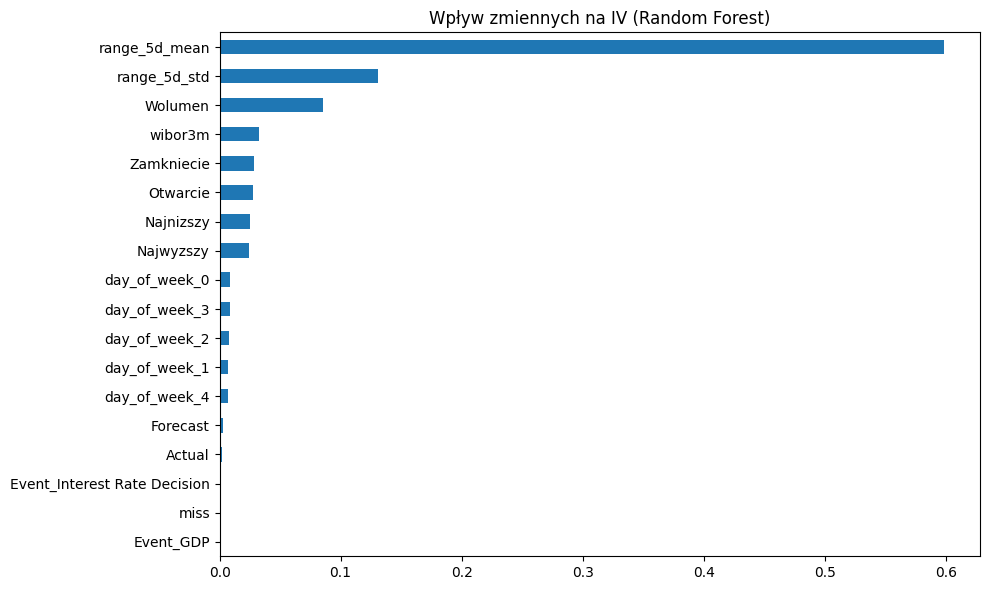

In [66]:
feature_importance.plot(kind='barh', figsize=(10, 6), title='Wpływ zmiennych na IV (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Final model tuning

In [67]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from hyperopt import hp, tpe, Trials, fmin, STATUS_OK
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [68]:
df.columns

Index(['Data', 'Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen',
       'wibor3m', 'Range', 'range_5d_mean', 'range_5d_std', 'IV',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'Actual', 'Forecast', 'miss', 'Event_GDP',
       'Event_Interest Rate Decision'],
      dtype='object')

In [69]:
X_cols = ['Zamkniecie', 'Wolumen', 'wibor3m', 'Actual',
       'Forecast', 'miss', 'Event_GDP', 'Event_Interest Rate Decision',
        'range_5d_mean', 'range_5d_std', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4']
X = df[X_cols]
y = df['IV']

# Podział czasowy
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Skaler nie jest wymagany dla XGB i LGBM, ale możesz dodać jeśli chcesz

# Definicja przestrzeni parametrów do tuningu (dla XGB)
xgb_space = {
    'max_depth': hp.choice('max_depth', range(4, 8)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
    'n_estimators': hp.choice('n_estimators', range(800, 2000)),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'gamma': hp.uniform('gamma', 2, 4)
}


In [70]:
def xgb_objective(params):
    model = XGBRegressor(
        objective='reg:squarederror',
        **params,
        verbosity=0
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, preds))
    return {'loss': mse, 'status': STATUS_OK}


xgb_trials = Trials()
best_xgb = fmin(
    fn=xgb_objective,
    space=xgb_space,
    algo=tpe.suggest,
    max_evals=500,
    trials=xgb_trials
)


best_xgb_params = {
    'max_depth': range(2, 5)[best_xgb['max_depth']],
    'learning_rate': best_xgb['learning_rate'],
    'n_estimators': range(800, 2000)[best_xgb['n_estimators']],
    'subsample': best_xgb['subsample'],
    'colsample_bytree': best_xgb['colsample_bytree'],
    'gamma': best_xgb['gamma'],
}

xgb_final = XGBRegressor(
    objective='reg:squarederror',
    **best_xgb_params,
    random_state=42
)
xgb_final.fit(X_train, y_train)
xgb_preds = xgb_final.predict(X_test)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [08:52<00:00,  1.06s/trial, best loss: 12.92663482128294]


In [71]:
importances = pd.Series(xgb_final.feature_importances_, index=X.columns)
importances

Zamkniecie                      0.042168
Wolumen                         0.086635
wibor3m                         0.096829
Actual                          0.007863
Forecast                        0.010942
miss                            0.010213
Event_GDP                       0.000000
Event_Interest Rate Decision    0.000000
range_5d_mean                   0.421458
range_5d_std                    0.150335
day_of_week_1                   0.016013
day_of_week_2                   0.083075
day_of_week_3                   0.048735
day_of_week_4                   0.025734
dtype: float32

In [72]:
comp_train = pd.DataFrame(y_train).reset_index(drop=True)
pred_train = xgb_final.predict(X_train)
pred_train = pd.DataFrame(pred_train)
comp_train['preds'] = pred_train
comp_train

,IV,preds
0,28.24,48.931355
1,41.78,50.267414
2,41.32,47.486942
3,59.03,68.685501
4,38.84,40.867550
...,...,...
3037,37.73,34.601524
3038,40.85,35.222717
3039,32.86,35.055294
3040,25.82,35.513641


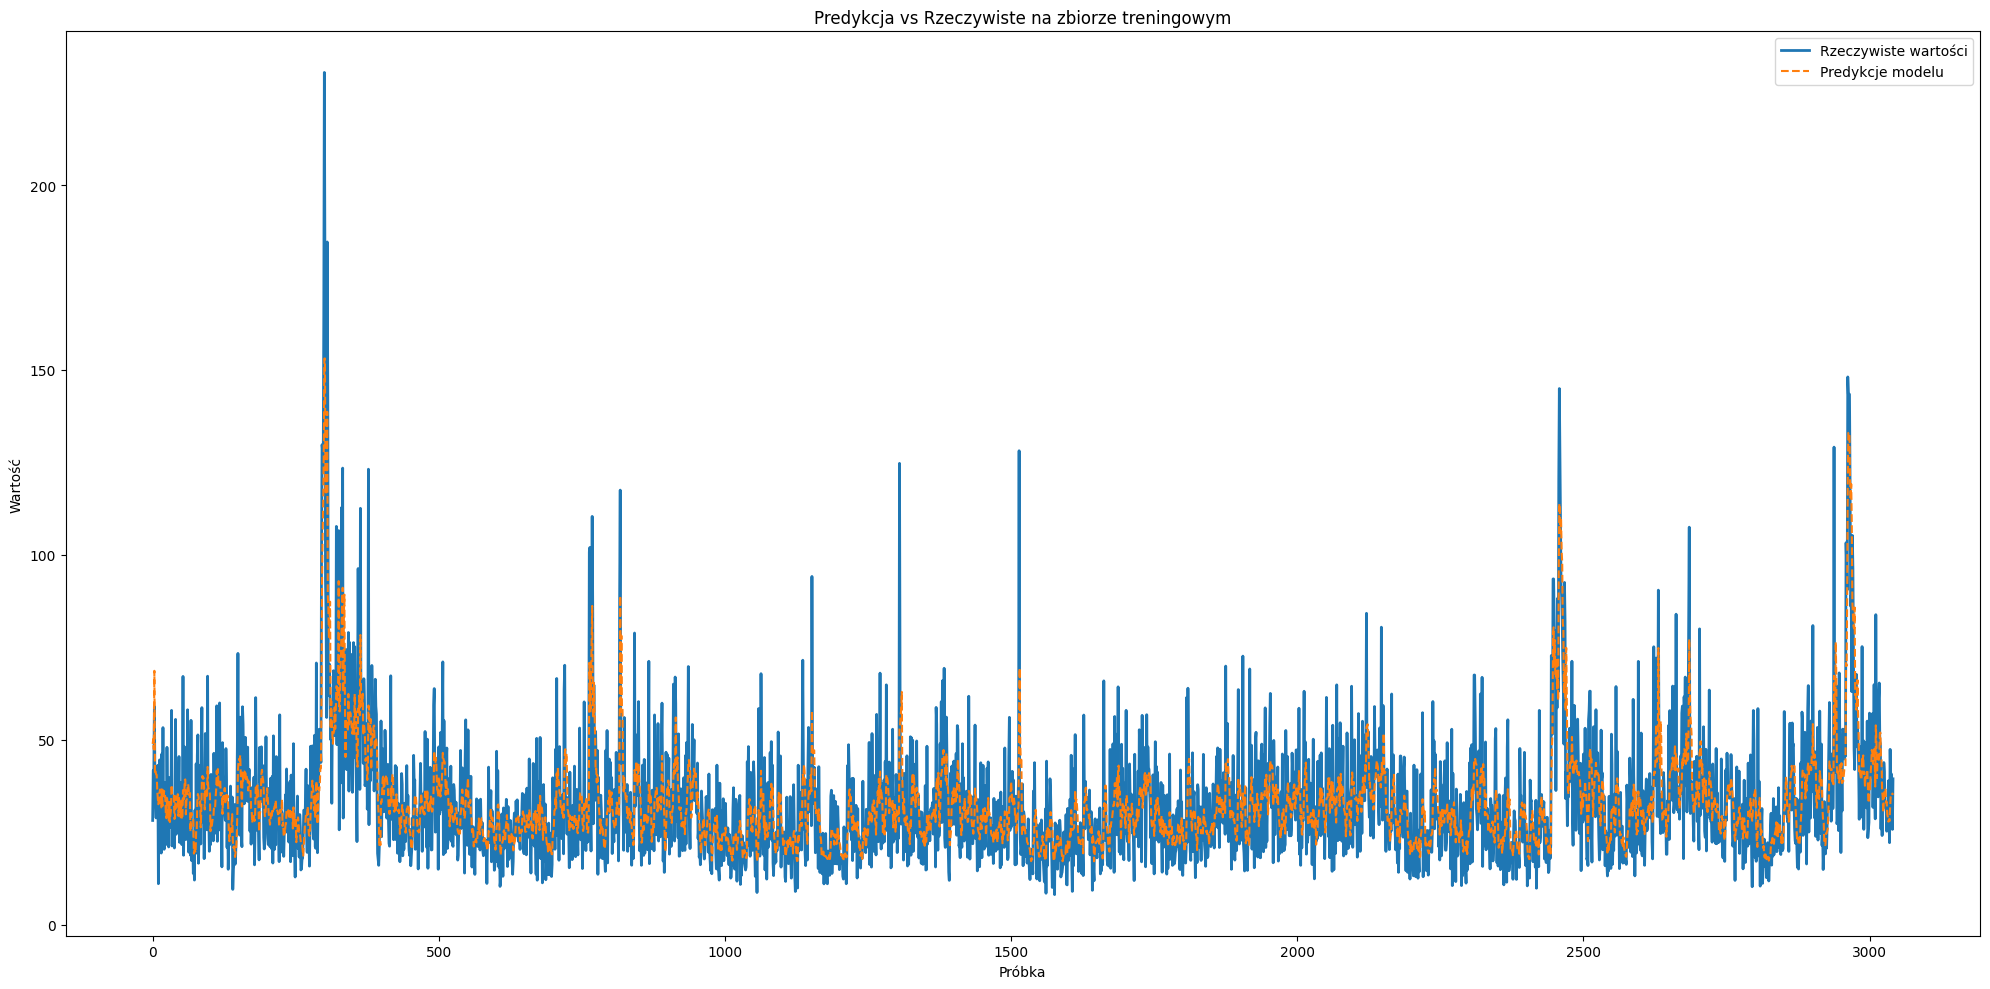

In [73]:
plt.figure(figsize=(20, 10))
plt.plot(comp_train['IV'], label='Rzeczywiste wartości', linewidth=2)
plt.plot(comp_train['preds'], label='Predykcje modelu', linestyle='--')
plt.title('Predykcja vs Rzeczywiste na zbiorze treningowym')
plt.xlabel('Próbka')
plt.ylabel('Wartość')
plt.legend()
plt.tight_layout()
plt.show()

In [74]:
comp_test = pd.DataFrame(y_test).reset_index(drop=True)
pred_test = xgb_final.predict(X_test)
pred_test = pd.DataFrame(pred_test)
comp_test['preds'] = pred_test
comp_test

,IV,preds
0,40.29,33.837795
1,17.75,30.131422
2,29.94,30.268028
3,33.10,30.709028
4,36.52,31.275028
...,...,...
756,39.65,52.346245
757,29.29,61.674583
758,77.38,88.427261
759,36.15,45.946400


In [75]:
mse1 = np.sqrt(mean_squared_error(pred_test,y_test))

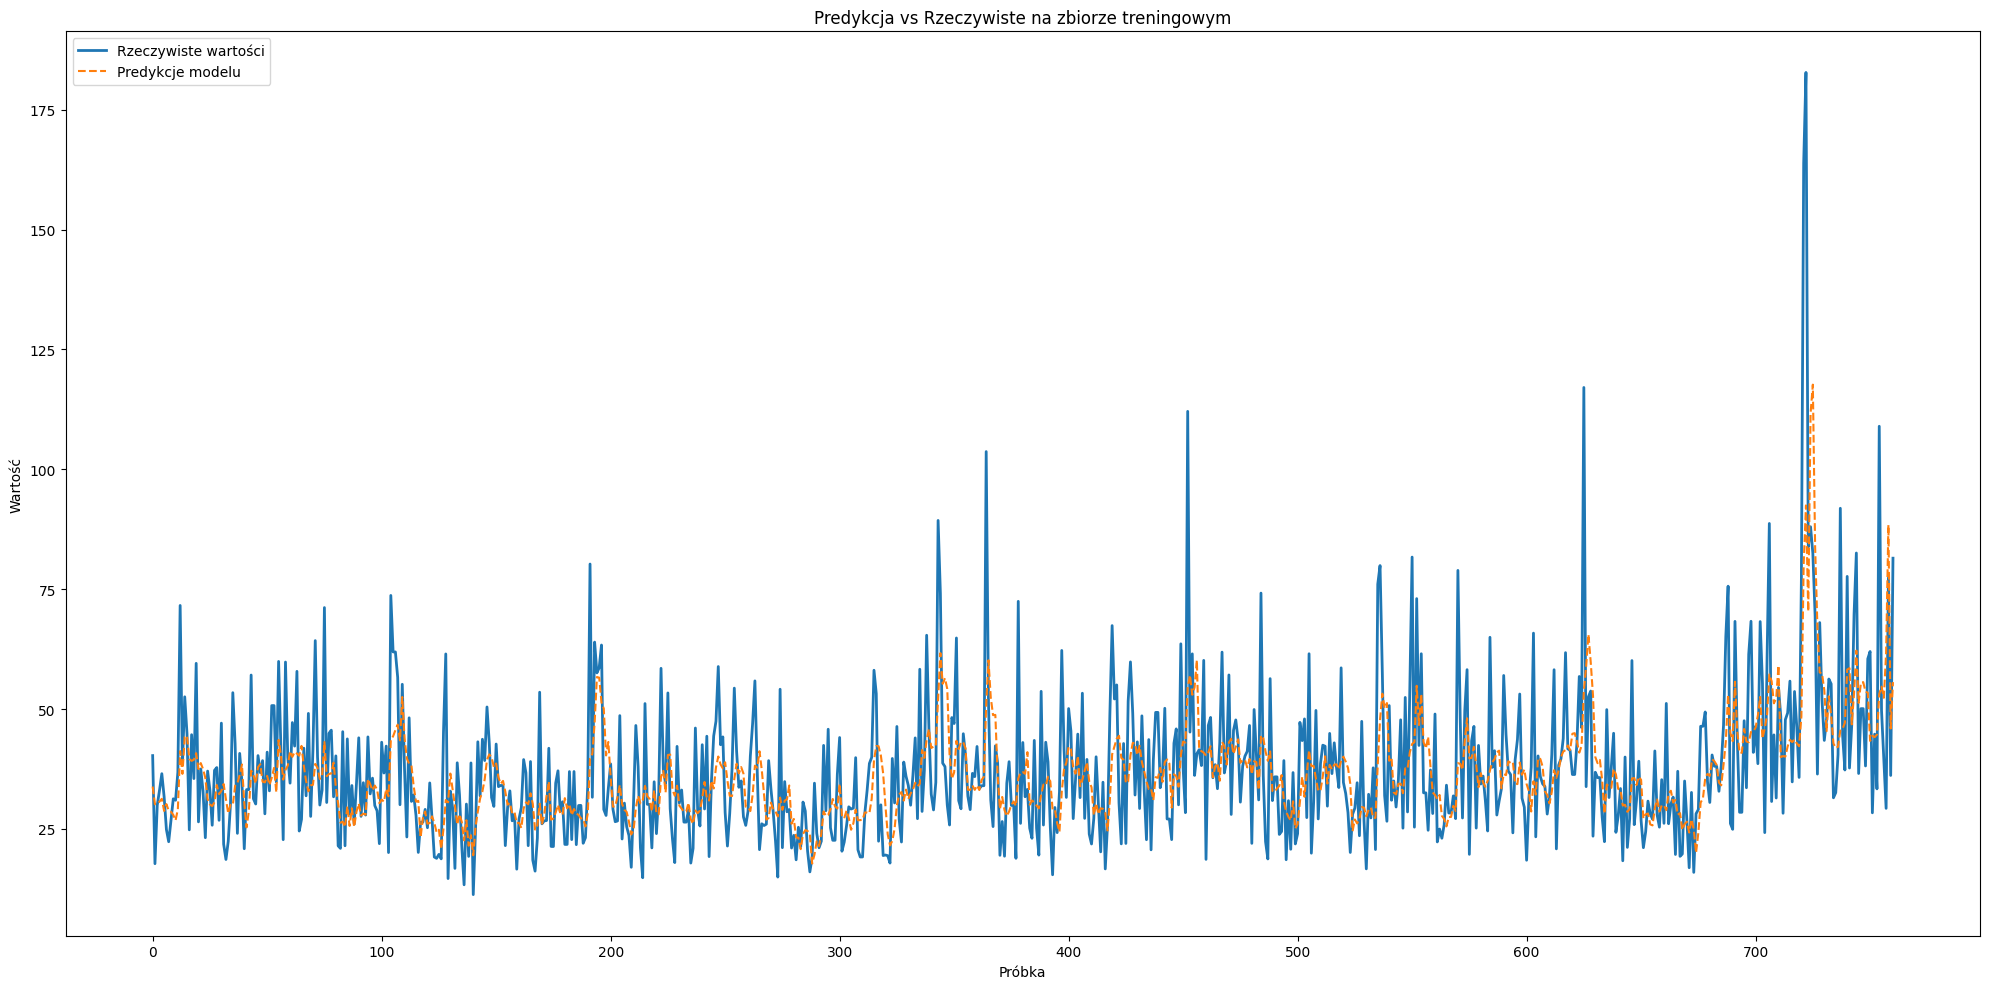

In [76]:
plt.figure(figsize=(20, 10))
plt.plot(comp_test['IV'], label='Rzeczywiste wartości', linewidth=2)
plt.plot(comp_test['preds'], label='Predykcje modelu', linestyle='--')
plt.title('Predykcja vs Rzeczywiste na zbiorze treningowym')
plt.xlabel('Próbka')
plt.ylabel('Wartość')
plt.legend()
plt.tight_layout()
plt.show()

In [77]:
weights = np.where(
    y_train > y_train.quantile(0.90),  # górne 10%
    20.0,
    np.where(
        y_train < y_train.quantile(0.30),  # dolne 10%
        0.5,  # nadaj niższą wagę — model ma mniej przejmować się tymi punktami
        1.0   # cała reszta
    )
)
xgb_final.fit(X_train, y_train, sample_weight=weights)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7899538551255485, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=2.879850699090704,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.010061186611532042,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=859, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [78]:
train_pred3 = xgb_final.predict(X_train)
test_pred3 = xgb_final.predict(X_test)

In [79]:
comp_train3 = pd.DataFrame(y_train).reset_index(drop=True)
pred_train3 = xgb_final.predict(X_train)
pred_train3 = pd.DataFrame(train_pred3)
comp_train3['preds'] = train_pred3
comp_train3

,IV,preds
0,28.24,77.406776
1,41.78,72.420395
2,41.32,70.033333
3,59.03,80.265984
4,38.84,51.384541
...,...,...
3037,37.73,39.501556
3038,40.85,40.195080
3039,32.86,40.153458
3040,25.82,39.975677


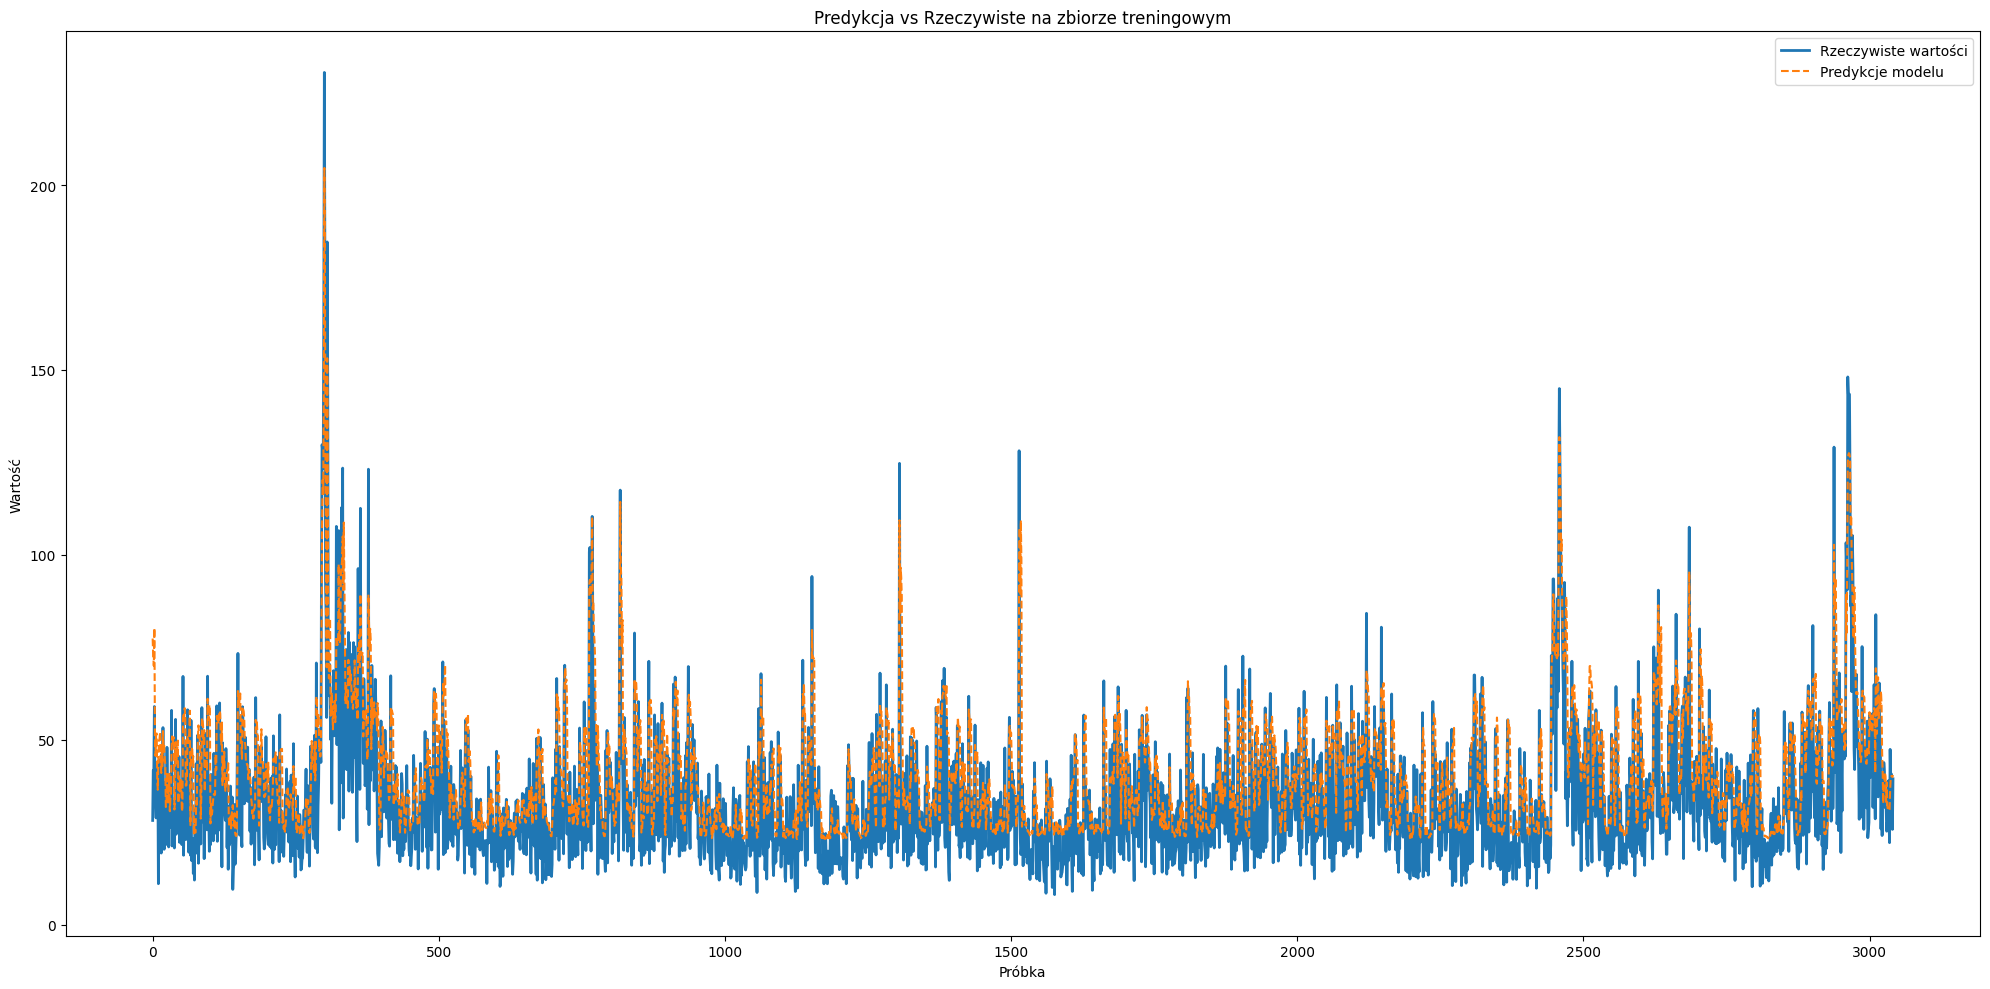

In [80]:
plt.figure(figsize=(20, 10))
plt.plot(comp_train3['IV'], label='Rzeczywiste wartości', linewidth=2)
plt.plot(comp_train3['preds'], label='Predykcje modelu', linestyle='--')
plt.title('Predykcja vs Rzeczywiste na zbiorze treningowym')
plt.xlabel('Próbka')
plt.ylabel('Wartość')
plt.legend()
plt.tight_layout()
plt.show()

In [82]:
comp_test3 = pd.DataFrame(y_test).reset_index(drop=True)
pred_test3 = xgb_final.predict(X_test)
pred_test3 = pd.DataFrame(pred_test3)
comp_test3['preds'] = pred_test3

,IV,preds
0,40.29,37.565250
1,17.75,34.271614
2,29.94,34.028511
3,33.10,35.376610
4,36.52,33.828808
...,...,...
756,39.65,69.348602
757,29.29,81.849487
758,77.38,98.100700
759,36.15,63.752655


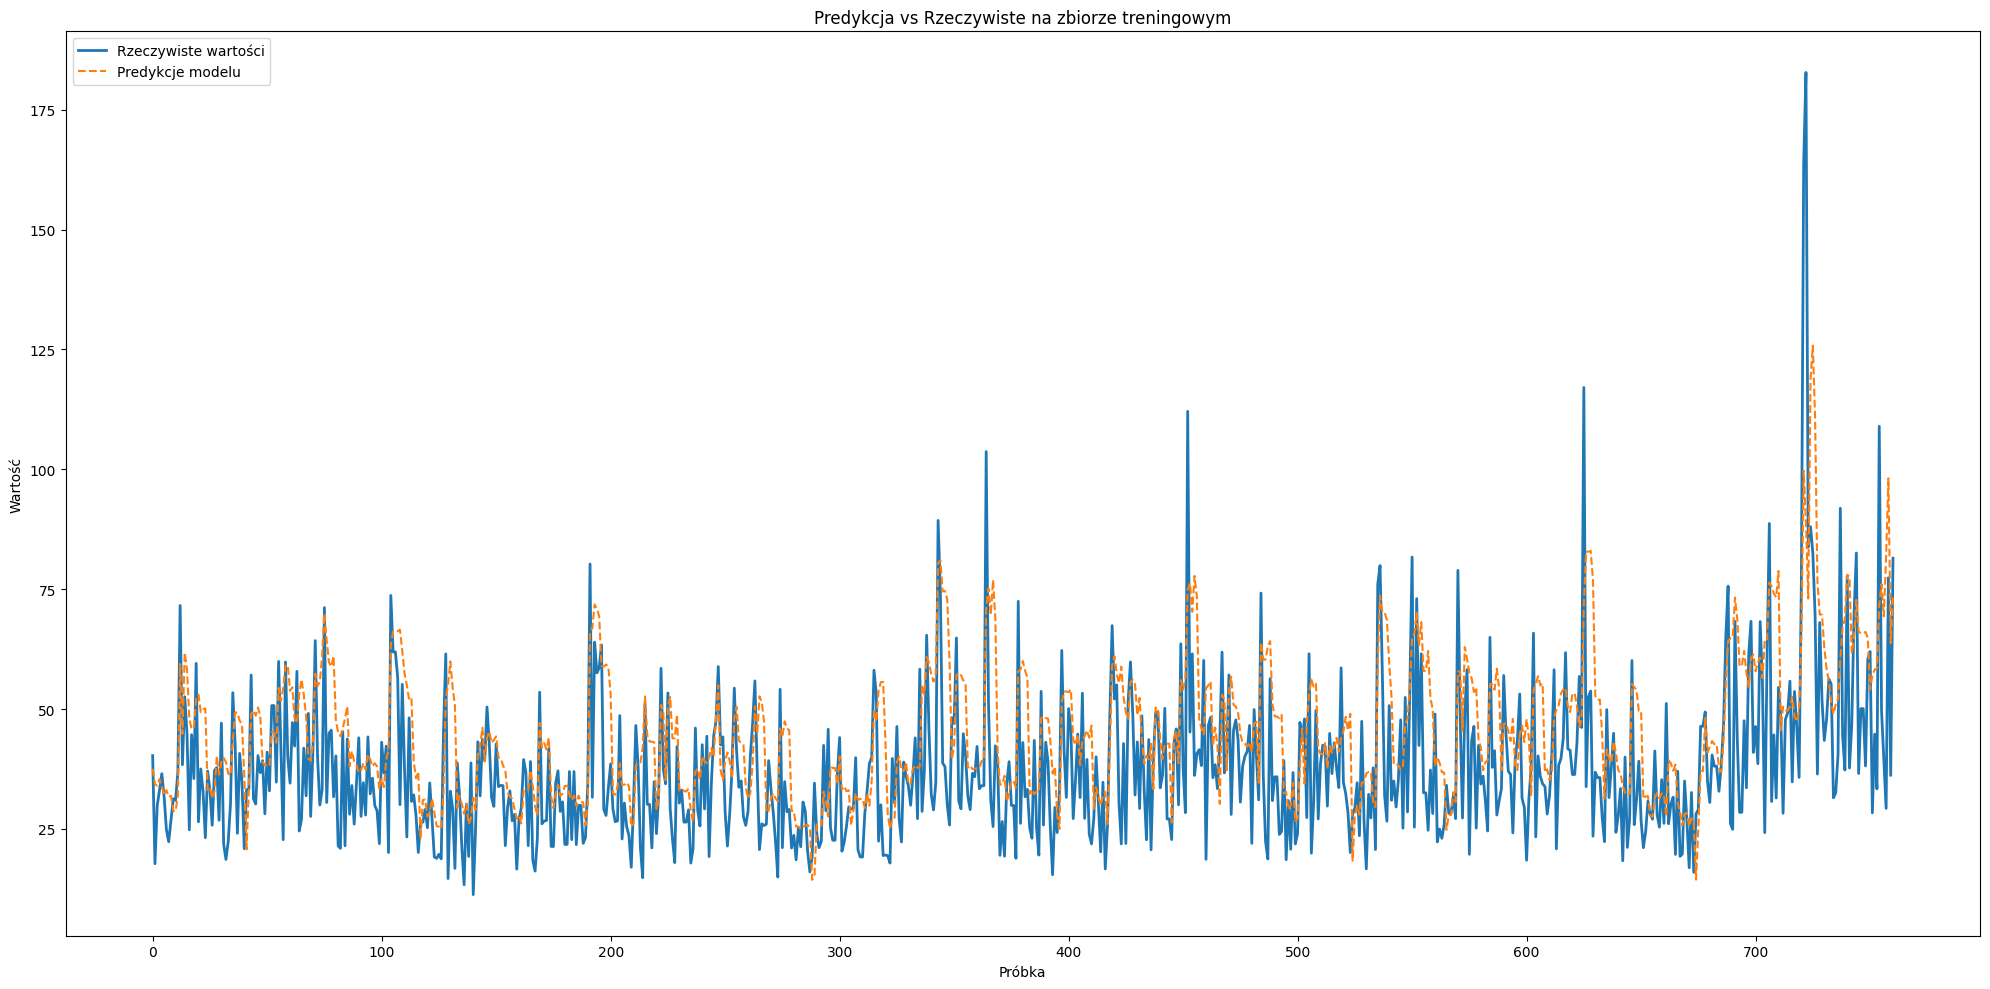

In [83]:
plt.figure(figsize=(20, 10))
plt.plot(comp_test3['IV'], label='Rzeczywiste wartości', linewidth=2)
plt.plot(comp_test3['preds'], label='Predykcje modelu', linestyle='--')
plt.title('Predykcja vs Rzeczywiste na zbiorze treningowym')
plt.xlabel('Próbka')
plt.ylabel('Wartość')
plt.legend()
plt.tight_layout()
plt.show()

ML+BS

In [116]:
import joblib

# 1. Zapisz wytrenowany model (np. XGBoost lub inny) do pliku
joblib.dump(xgb_final, 'xgb_model_IV_predictor.pkl')

['xgb_model_IV_predictor.pkl']

In [113]:
X_train

,Zamkniecie,Wolumen,wibor3m,Actual,Forecast,miss,Event_GDP,Event_Interest Rate Decision,range_5d_mean,range_5d_std,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4
0,2326.32,41872428.0,3.87,0.0,0.0,0.0,0,0,41.556,27.053075,1,0,0,0
1,2342.13,30980353.0,3.87,0.0,0.0,0.0,0,0,45.488,24.861941,0,1,0,0
2,2380.25,24252353.0,3.87,0.0,0.0,0.0,0,0,46.836,24.299006,0,0,1,0
3,2378.40,59360075.0,3.87,0.0,0.0,0.0,0,0,51.898,23.506976,0,0,0,1
4,2403.90,54416486.0,3.87,0.0,0.0,0.0,0,0,41.842,11.064923,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,1725.18,18556186.0,7.05,0.0,0.0,0.0,0,0,35.152,9.648514,0,0,0,1
3038,1681.75,21751199.0,7.05,0.0,0.0,0.0,0,0,35.532,9.870356,0,0,0,0
3039,1704.07,22796304.0,7.05,0.0,0.0,0.0,0,0,36.224,9.445098,1,0,0,0
3040,1707.11,28385312.0,7.05,0.0,0.0,0.0,0,0,36.942,8.165064,0,1,0,0


In [ ]:
#S0 - cena underlying 
#K - strike price w zależności od wybranej opcji ATM/OTM/ITM
#Call/Put
#Maturity
#T = Maturity/w stosunku do roku 
#r = wibor3m*0.01 
#sigma z ML 
#Q nie trzeba

In [91]:
def prepare_bs_input_ATM(df, sigma_from_model, option_type='call', maturity_days=1):

    last = df.iloc[-1]
    S0 = last['Zamkniecie']
    K = round(S0 / 5) * 5
    r = last['wibor3m'] * 0.01
    T = maturity_days / 252

    return {
        'S0': S0,
        'K': K,
        'T': T,
        'r': r,
        'sigma': sigma_from_model,
        'option_type': option_type
    }

In [93]:
def bs73(S0, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

    
    return price

In [ ]:
bs73(
    S0=bs_input_df['S0'][0],
    K=bs_input_df['K'][0],
    T=bs_input_df['T'][0],
    r=bs_input_df['r'][0],
    sigma=bs_input_df['sigma'][0],
    option_type=bs_input_df['option_type'][0]
)